In [44]:
import numpy as np
import pandas as pd
import ast
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel
#Import TfIdfVectorizer (scikit-learn)
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from collections import Counter
import string
import re
import unidecode

In [47]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/david/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

# Food-com

## Data-Source
- the data was downloaded from:

https://www.kaggle.com/shuyangli94/food-com-recipes-and-user-interactions

**Data description:**
This dataset consists of 180K+ recipes and 700K+ recipe reviews covering 18 years of user interactions and uploads on Food.com (formerly GeniusKitchen). used in the following paper:

Generating Personalized Recipes from Historical User Preferences
Bodhisattwa Prasad Majumder*, Shuyang Li*, Jianmo Ni, Julian McAuley
EMNLP, 2019
https://www.aclweb.org/anthology/D19-1613/


**License:**

Kaggle: Data files © Original Authors

Paper: 
ACL materials are Copyright © 1963–2022 ACL; other materials are copyrighted by their respective copyright holders. Materials prior to 2016 here are licensed under the Creative Commons Attribution-NonCommercial-ShareAlike 3.0 International License. Permission is granted to make copies for the purposes of teaching and research. Materials published in or after 2016 are licensed on a Creative Commons Attribution 4.0 International License.

The ACL Anthology is managed and built by the ACL Anthology team of volunteers.

Site last built on 20 January 2022 at 01:07 UTC with commit 7c68786d.

## Data exploration

In [2]:
data_path = "/home/david/Projects/Hackathons/DeveloperWeek2022/RecipeSuggestions/data/"

In [3]:
# need to convert string representation of ingredients list to list using ast
raw_recipes = pd.read_csv(data_path + "RAW_recipes.csv", converters={'ingredients': ast.literal_eval})
raw_recipes.head(5)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"[winter squash, mexican seasoning, mixed spice...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"[prepared pizza crust, sausage patty, eggs, mi...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"[ground beef, yellow onions, diced tomatoes, t...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","[spreadable cheese with garlic and herbs, new ...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"[tomato juice, apple cider vinegar, sugar, sal...",8


In [8]:
#raw_recipes.iloc[4]['ingredients']

In [4]:
raw_interactions = pd.read_csv(data_path + "RAW_interactions.csv")
raw_interactions.head(5)

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


### Number of recipes

In [ ]:
nr_recipes = len(raw_recipes)
print("There are ", nr_recipes, " in the database.")

### Distribution of number of ingredients

In [ ]:
raw_recipes.hist(column="n_ingredients")

In [ ]:
print("The average number of ingredients for a recipe is ", raw_recipes["n_ingredients"].mean())

### Time of preparation for recipies

In [ ]:
raw_recipes.hist(column="minutes")

In [ ]:
print("The average time for preparation of a recipe is ", raw_recipes["minutes"].mean())

In [ ]:
raw_recipes["minutes"].max()

In [ ]:
raw_recipes["minutes"].min()

In [ ]:
raw_recipes["minutes"].median()

# Salad-recipes

## Data source

https://www.kaggle.com/snehallokesh31096/recipe



## Data exploration

In [6]:
path = "/home/david/Projects/Hackathons/DeveloperWeek2022/RecipeSuggestions/data/salad-recipe-data/"
df = pd.read_csv(path + "recipes_82k.csv")
df.head(10)

,category,cooking_method,cuisine,image,ingredients,prep_time,recipe_name,serves,tags
0,NaN,['Set the racks in the middle and upper thirds...,['American'],https://www.skinnytaste.com/wp-content/uploads...,"['1 tablespoons extra virgin olive oil', '1 cu...",20 minutes,Mediterranean Sea Bass,4 servings,"Dairy Free, Gluten Free, Keto Recipes, Kid Fri..."
1,NaN,['Place the eggs in the air fryer basket and c...,['American'],https://www.skinnytaste.com/wp-content/uploads...,"['4 large eggs', 'Salt (black pepper, everythi...",15 minutes,Air Fryer Hard Boiled Eggs,4 eggs,"Air Fryer Recipes, Dairy Free, Gluten Free, Ke..."
2,NaN,"['Air Fryer directions:', 'Preheat air fryer t...",['American'],https://www.skinnytaste.com/wp-content/uploads...,"['olive oil spray', '4 about 5 ounce each salm...",5 minutes,Air Fryer Basil-Parmesan Salmon,4 servings,"Air Fryer Recipes, Gluten Free, Keto Recipes, ..."
3,NaN,"['Preheat the oven to 400F.', 'Pour 2 tablespo...",['American'],https://www.skinnytaste.com/wp-content/uploads...,['1/2 cup freshly grated Parmesan (not pre-gra...,15 minutes,Everything Parmesan Crisps,4 servings,"Gluten Free, Keto Recipes, Kid Friendly, Low C..."
4,NaN,['Cook potatoes in a large pot of salted water...,['American'],https://www.skinnytaste.com/wp-content/uploads...,['3 1/2 pounds new potatoes (about 10 peeled a...,10 minutes,Potato and Green Bean Salad,12 servings,"Dairy Free, Gluten Free, Kid Friendly, Vegetar..."
5,NaN,"['To Make the soup:', 'Heat 1 tablespoon of oi...",['American'],https://www.skinnytaste.com/wp-content/uploads...,"['2 tablespoons high-heat oil', '1 medium yell...",5 minutes,Green Detox Soup with Toasted Hemp Gremolata,2 servings,"Dairy Free, Gluten Free, Under 30 Minutes, Veg..."
6,NaN,['Preheat the to 350F degrees. Spray a pie dis...,['American'],https://www.skinnytaste.com/wp-content/uploads...,"['cooking spray', '1 3/4 cups diced ham steak ...",15 minutes,Ham and Swiss Crustless Quiche,6 servings,"Gluten Free, Keto Recipes, Kid Friendly, Low C..."
7,NaN,['Combine sour cream and brown sugar and mix w...,['American'],https://www.skinnytaste.com/wp-content/uploads...,"['16 oz strawberries (washed and cut)', '4 oz ...",5 minutes,Strawberries Romanoff,5 Servings,"Gluten Free, Kid Friendly, Low Carb, Under 30 ..."
8,NaN,['Preheat the oven to 450F. Place a silicone l...,['American'],https://www.skinnytaste.com/wp-content/uploads...,['1 cup 5 oz all purpose or white whole wheat ...,15 minutes,Smoked Salmon Breakfast Flatbread,4 servings,"Air Fryer Recipes, Gluten Free, Under 30 Minutes"
9,NaN,[],NaN,https://www.skinnytaste.com/wp-content/uploads...,[],0 minutes,Skinnytaste Air Fryer Cookbook: Get a Free 39,0,Air Fryer Recipes


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82245 entries, 0 to 82244
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   category        18107 non-null  object
 1   cooking_method  82245 non-null  object
 2   cuisine         82230 non-null  object
 3   image           82245 non-null  object
 4   ingredients     82245 non-null  object
 5   prep_time       58630 non-null  object
 6   recipe_name     82245 non-null  object
 7   serves          82244 non-null  object
 8   tags            82011 non-null  object
dtypes: object(9)
memory usage: 5.6+ MB


In [26]:
print("Number of rows in dataframe: ", len(df))

Number of rows in dataframe:  82245


## Number of ingredients

In [24]:
print('No of unique sets of ingredients: ', len(df['ingredients'].unique().tolist()))

No of unique sets of ingredients:  61198


In [25]:
print('No of unique recipe names: ',len(df['recipe_name'].unique().tolist()))

No of unique recipe names:  55838


## Drop recipes with the same set of ingredients

In [27]:
df = df.drop_duplicates(keep='first')
df.reset_index(drop=True, inplace=True)
print("Number of unique entries: ", len(df))

Number of unique entries:  72909


## Count missing data values

In [35]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
category,54874,0.752637
prep_time,20996,0.287975
tags,234,0.003209
cuisine,15,0.000206
serves,1,0.000014


## Analyze word frequency

In [38]:
vocabulary = nltk.FreqDist()
# This was done once I had already preprocessed the ingredients
for ingredients in df['ingredients']:
    ingredients = ingredients.split()
    vocabulary.update(ingredients)
for word, frequency in vocabulary.most_common(200):
    print(f'{word};{frequency}')

'1;223876
cup;152375
'2;125691
tablespoons;82565
'1/2;78435
and;77694
teaspoon;77062
cups;54631
'1/4;52419
ground;48120
tablespoon;47310
fresh;43989
'3;38874
pepper',;38048
for;37620
or;36168
1/2;35277
'4;34000
oil',;33602
chopped;33246
black;32845
salt',;31001
freshly;30073
chopped',;28910
ounces;27162
olive;26096
sugar',;25527
large;25497
teaspoons;25125
to;24576
into;23015
red;22500
cut;21612
['1;20893
finely;20817
plus;19202
pound;18656
'Kosher;16681
white;16077
of;15481
unsalted;15085
1;14995
butter',;14558
salt;14132
garlic,;13938
small;13833
'Salt;13826
['2;13711
sliced;13598
flour',;13416
'6;13282
powder',;13202
grated;12978
sliced',;12779
'3/4;12752
onion,;12578
chicken;12321
cloves;12282
pounds;11845
'8;11844
butter,;11756
juice',;11371
(about;11348
all-purpose;11291
2;11086
vinegar',;10856
thinly;10826
medium;10623
leaves',;10622
peeled;10617
cream',;10554
sauce',;10405
recipe;10116
vanilla;9916
dried;9665
green;9557
extra-virgin;9435
diced',;9256
kosher;9228
'1/3;9199
water

## Access images of food

In [7]:
df.iloc[2]['image']

'https://www.skinnytaste.com/wp-content/uploads/2019/05/Air-Fryer-Basil-Parmesan-Salmon-8.jpg'

In [8]:
from PIL import Image
import requests
from io import BytesIO

In [10]:
response = requests.get(df.iloc[2]['image'])

In [15]:
response

<Response [200]>

In [11]:
img = Image.open(BytesIO(response.content))

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

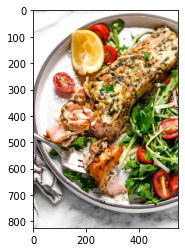

In [14]:
imgplot = plt.imshow(img)